In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


# Import Library

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider, Button

In [10]:
# Keras functions
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

# Keras dataset
from keras.datasets import mnist

# Keras utils
from keras.utils import np_utils

from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate, add

In [4]:
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

In [5]:
x_train0.shape

(60000, 28, 28)

In [6]:
x_train = x_train0.reshape(60000, 784)
x_test = x_test0.reshape(10000, 784)

In [7]:
x_train.shape

(60000, 784)

In [8]:
x_train -= x_train.min()
x_train = x_train/x_train.max()
x_test -= x_test.min()
x_test = x_test/x_test.max()

In [9]:
len(y_train0)

60000

# 資料整理分類

In [11]:
y_train = np_utils.to_categorical(y_train0,10)
y_test = np_utils.to_categorical(y_test0,10)

# 設計架構

<img src="Structure.png" title="Title text" />

In [12]:
x = Input(shape=(784,))
f1 = Dense(50, activation='relu')

f21 = Dense(20, activation='relu')
f22 = Dense(40, activation='relu')

f31 = Dense(50, activation='relu')
f32 = Dense(100, activation='relu')

f4 = Dense(300,activation='relu')

f5 = Dense(10, activation='softmax')

In [13]:
h_1 = f1(x)

h_21 = f21(h_1)
h_31 = f31(h_21) 

h_22 = f22(h_1)
h_32 = f32(h_22)

h_4 = f4(concatenate([h_31,h_32]))

y = f5(h_4)

In [14]:
model = Model(x, y)
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 784)           0                                            
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 50)            39250       input_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 20)            1020        dense_1[0][0]                    
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 40)            2040        dense_1[0][0]                    
___________________________________________________________________________________________

In [15]:
model.compile(loss='mse', optimizer=SGD(lr=0.3), metrics=['accuracy'])
model_info = model.fit(x_train, y_train, batch_size=1000, epochs=100,shuffle=True)

Epoch 1/100
60000/60000 [==============================] - 3s - loss: 0.0899 - acc: 0.1291     
Epoch 2/100
60000/60000 [==============================] - 3s - loss: 0.0894 - acc: 0.1580     
Epoch 3/100
60000/60000 [==============================] - 3s - loss: 0.0887 - acc: 0.1482     
Epoch 4/100
60000/60000 [==============================] - 3s - loss: 0.0876 - acc: 0.1505     
Epoch 5/100
60000/60000 [==============================] - 3s - loss: 0.0853 - acc: 0.2003     
Epoch 6/100
60000/60000 [==============================] - 3s - loss: 0.0819 - acc: 0.3109     
Epoch 7/100
60000/60000 [==============================] - 3s - loss: 0.0775 - acc: 0.3887     
Epoch 8/100
60000/60000 [==============================] - 3s - loss: 0.0718 - acc: 0.4547     
Epoch 9/100
60000/60000 [==============================] - 3s - loss: 0.0641 - acc: 0.5505     
Epoch 10/100
60000/60000 [==============================] - 3s - loss: 0.0542 - acc: 0.6639     
Epoch 11/100
60000/60000 [=============

60000/60000 [==============================] - 3s - loss: 0.0076 - acc: 0.9526     
Epoch 86/100
60000/60000 [==============================] - 3s - loss: 0.0075 - acc: 0.9530     
Epoch 87/100
60000/60000 [==============================] - 3s - loss: 0.0075 - acc: 0.9535     
Epoch 88/100
60000/60000 [==============================] - 3s - loss: 0.0074 - acc: 0.9536     
Epoch 89/100
60000/60000 [==============================] - 3s - loss: 0.0074 - acc: 0.9540     
Epoch 90/100
60000/60000 [==============================] - 3s - loss: 0.0073 - acc: 0.9546     
Epoch 91/100
60000/60000 [==============================] - 3s - loss: 0.0073 - acc: 0.9547     
Epoch 92/100
60000/60000 [==============================] - 4s - loss: 0.0073 - acc: 0.9550     
Epoch 93/100
60000/60000 [==============================] - 3s - loss: 0.0072 - acc: 0.9554     
Epoch 94/100
60000/60000 [==============================] - 3s - loss: 0.0072 - acc: 0.9558     
Epoch 95/100
60000/60000 [=================

# 分析結果

In [16]:
score = model.evaluate(x_test, y_test)
print('model:')
print('loss:', score[0])
print('正確率:', score[1])

 9856/10000 [============================>.] - ETA: 0smodel:
loss: 0.007359472229360836
正確率: 0.9501


<function matplotlib.pyplot.show(*args, **kw)>

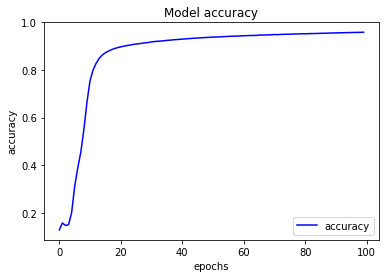

In [17]:
plt.plot(model_info.history['acc'],c = 'b')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(["accuracy"],loc = "best")
plt.show

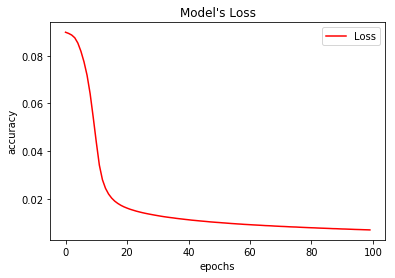

In [18]:
plt.plot(model_info.history['loss'], label='Loss', c="r")

plt.title("Model's Loss")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(loc="best")
plt.show()